In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train_strict_domain.csv')
test_df = pd.read_csv('test_strict_domain.csv')
val_df = pd.read_csv('val_strict_domain.csv')

# Display the first few rows of each DataFrame
print("Train DataFrame:")
display(train_df.head())

print("\nTest DataFrame:")
display(test_df.head())

print("\nValidation DataFrame:")
display(val_df.head())

Train DataFrame:


,text,label_raw,label,source
0,दोघांचं लग्न ठरतं आणि इथूनच कथेला वळण येतं,0,neutral,MR
1,- जा आणि त्याला घेऊन जा!,0,neutral,MS
2,पण योग्य विपणन दिले ... ... आम्ही थँक्सगिव्हिं...,1,positive,MS
3,उत्तम सिनेमॅटोग्राफीसिरीजमधील आणखी एक महत्त्वा...,0,neutral,MR
4,आमच्या भविष्यात तुम्हाला मुले दिसत नाहीत का?,0,neutral,MS



Test DataFrame:


,text,label_raw,label,source
0,"भयपट म्हटले की ठरावीक पद्धतीची कथा, मांडणी या ...",-1,negative,MR
1,आपण पूर्णपणे सांगू शकता!,0,neutral,MS
2,तेव्हा तो संतापतो,-1,negative,MR
3,पण त्यात तो अनुत्तीर्ण होतो,-1,negative,MR
4,त्यामुळे भगवानदासचा ब्राह्मण असण्याचा गर्व आणि...,1,positive,MR



Validation DataFrame:


,text,label_raw,label,source
0,"आपण या मुलाच्या पूर्णपणे प्रेमात होता जो, समलि...",0,neutral,MS
1,जर तो एक स्त्री असता तर.,0,neutral,MS
2,तात्या गावातील विविधांगी समस्यांचा सुवर्णमध्य ...,1,positive,MR
3,"चला, आम्ही एकत्र छान आहोत.",1,positive,MS
4,आम्हाला एक समस्या.,-1,negative,MS


In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Define parameters
vocab_size = 25000  # Increased vocabulary size
max_length = 100  # Adjusted max length
embedding_dim = 100
lstm_units = 64
epochs = 10
batch_size = 32

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Fit the tokenizer on the training data text
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare labels (convert to numerical and then one-hot encode)
# Assuming labels are 'positive', 'negative', 'neutral'
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_df['label'].map(label_map)
test_labels = test_df['label'].map(label_map)
val_labels = val_df['label'].map(label_map)

train_labels_encoded = to_categorical(train_labels, num_classes=3)
test_labels_encoded = to_categorical(test_labels, num_classes=3)
val_labels_encoded = to_categorical(val_labels, num_classes=3)

print("Data preprocessing complete.")
print("Shape of training data:", train_padded.shape)
print("Shape of training labels:", train_labels_encoded.shape)
print("Shape of test data:", test_padded.shape)
print("Shape of test labels:", test_labels_encoded.shape)
print("Shape of validation data:", val_padded.shape)
print("Shape of validation labels:", val_labels_encoded.shape)

Data preprocessing complete.
Shape of training data: (21000, 100)
Shape of training labels: (21000, 3)
Shape of test data: (4500, 100)
Shape of test labels: (4500, 3)
Shape of validation data: (4500, 100)
Shape of validation labels: (4500, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Build the Bidirectional LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Bidirectional(LSTM(lstm_units)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(train_padded, train_labels_encoded,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_padded, val_labels_encoded),
                    verbose=1)

print("Model training complete.")

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4832 - loss: 0.9911 - val_accuracy: 0.6713 - val_loss: 0.7399
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7933 - loss: 0.5436 - val_accuracy: 0.6887 - val_loss: 0.7373
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8790 - loss: 0.3368 - val_accuracy: 0.6744 - val_loss: 0.8659
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9225 - loss: 0.2114 - val_accuracy: 0.6733 - val_loss: 1.0896
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9424 - loss: 0.1540 - val_accuracy: 0.6693 - val_loss: 1.3207
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9571 - loss: 0.1227 - val_accuracy: 0.6649 - val_loss: 1.4580
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9652 - loss: 0.0944 - val_accuracy: 0.6469 - val_loss: 1.7765
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9636 - loss: 0.0930 - 

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_labels_encoded, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 2.1860
Test Accuracy: 0.6518


In [9]:
# Predict sentiment on the test data
predictions = model.predict(test_padded)

# Convert predictions to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)

# Map numerical labels back to sentiment strings
reverse_label_map = {0: 'positive', 1: 'negative', 2: 'neutral'}
predicted_sentiment = [reverse_label_map[label] for label in predicted_labels]

# Add predicted sentiment to the test_df
test_df['predicted_label'] = predicted_sentiment

print("Sentiment prediction complete.")
display(test_df.head())

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Sentiment prediction complete.


,text,label_raw,label,source,predicted_label
0,"भयपट म्हटले की ठरावीक पद्धतीची कथा, मांडणी या ...",-1,negative,MR,neutral
1,आपण पूर्णपणे सांगू शकता!,0,neutral,MS,neutral
2,तेव्हा तो संतापतो,-1,negative,MR,neutral
3,पण त्यात तो अनुत्तीर्ण होतो,-1,negative,MR,neutral
4,त्यामुळे भगवानदासचा ब्राह्मण असण्याचा गर्व आणि...,1,positive,MR,negative


In [10]:
# Separate reviews by predicted sentiment
positive_reviews = test_df[test_df['predicted_label'] == 'positive']['text'].str.cat(sep=' ')
negative_reviews = test_df[test_df['predicted_label'] == 'negative']['text'].str.cat(sep=' ')
neutral_reviews = test_df[test_df['predicted_label'] == 'neutral']['text'].str.cat(sep=' ')

print("Reviews separated by predicted sentiment.")

Reviews separated by predicted sentiment.


In [ ]:
!pip install wordcloud matplotlib

Font already exists.


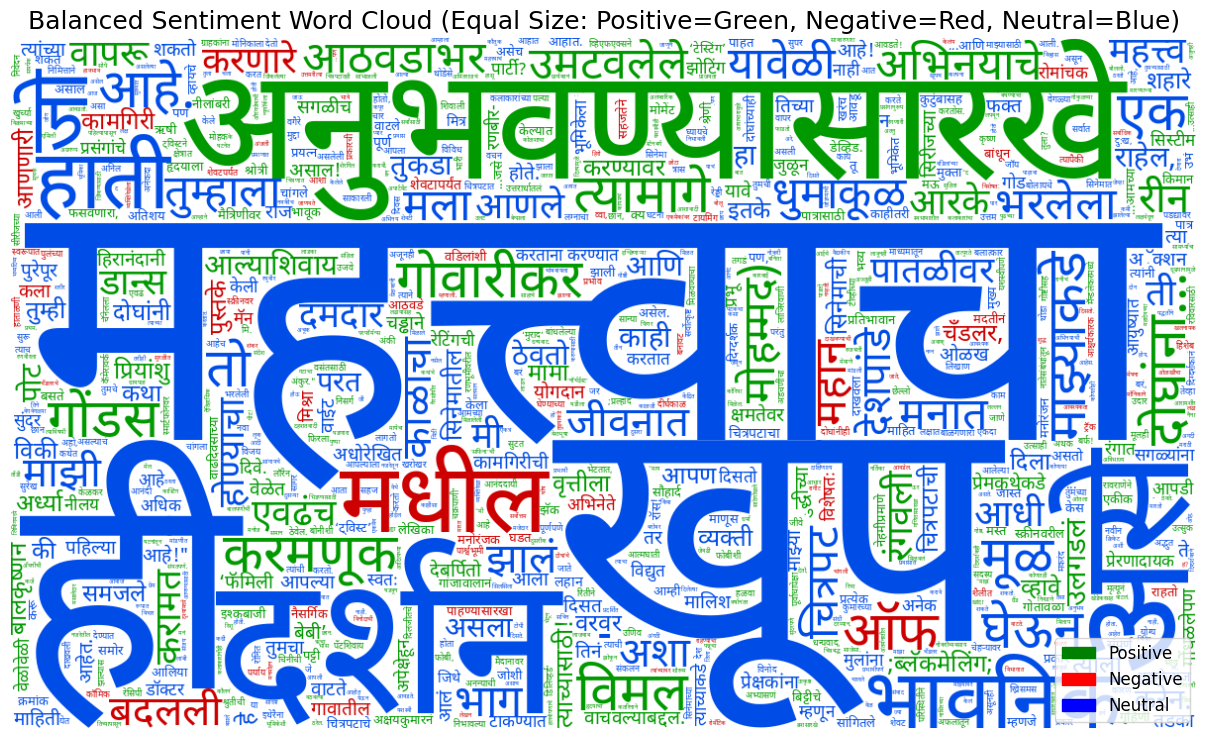

In [14]:
import os
import requests
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
import random

# ---------------------------
# 1) Download font if needed
# ---------------------------
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

if not os.path.exists(font_path):
    print(f"Downloading font from {font_url}...")
    response = requests.get(font_url)
    response.raise_for_status()
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print("Font downloaded successfully.")
else:
    print("Font already exists.")

# -----------------------------------------------------
# 2) Collect reviews if not already defined
# -----------------------------------------------------
try:
    positive_reviews
except NameError:
    positive_reviews = " ".join(test_df[test_df['predicted_label'] == 'positive']['cleaned_text'].astype(str).tolist())

try:
    negative_reviews
except NameError:
    negative_reviews = " ".join(test_df[test_df['predicted_label'] == 'negative']['cleaned_text'].astype(str).tolist())

try:
    neutral_reviews
except NameError:
    neutral_reviews = " ".join(test_df[test_df['predicted_label'] == 'neutral']['cleaned_text'].astype(str).tolist())

# ----------------------------------------
# 3) Tokenize into word lists
# ----------------------------------------
pos_words = [w.strip() for w in positive_reviews.split() if w.strip()]
neg_words = [w.strip() for w in negative_reviews.split() if w.strip()]
neu_words = [w.strip() for w in neutral_reviews.split() if w.strip()]

# -------------------------------------------------------
# 4) Balance by sampling equal number of words
# -------------------------------------------------------
min_len = min(len(pos_words), len(neg_words), len(neu_words))
random.seed(42)  # reproducibility

pos_sample = random.sample(pos_words, min_len)
neg_sample = random.sample(neg_words, min_len)
neu_sample = random.sample(neu_words, min_len)

# ⚡ Equalize frequencies (so all sentiments have same font sizes)
word_frequencies = {}
word_sentiment = {}

for w in pos_sample:
    word_frequencies[w] = 1
    word_sentiment[w] = "positive"

for w in neg_sample:
    word_frequencies[w] = 1
    word_sentiment[w] = "negative"

for w in neu_sample:
    word_frequencies[w] = 1
    word_sentiment[w] = "neutral"

# -------------------------------------------------------
# 5) Color function
# -------------------------------------------------------
def color_func(word, **kwargs):
    sentiment = word_sentiment.get(word, "neutral")
    if sentiment == "positive":
        return "hsl(120, 100%, 30%)"   # strong green
    elif sentiment == "negative":
        return "hsl(0, 100%, 40%)"     # strong red
    else:
        return "hsl(220, 100%, 45%)"   # strong blue

# -------------------------------------------------------
# 6) Generate and show balanced WordCloud
# -------------------------------------------------------
wc = WordCloud(
    width=1200,
    height=700,
    background_color="white",
    font_path=font_path,
    stopwords=STOPWORDS,
    prefer_horizontal=0.9,
    max_words=3*min_len,
    color_func=color_func
).generate_from_frequencies(word_frequencies)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Balanced Sentiment Word Cloud (Equal Size: Positive=Green, Negative=Red, Neutral=Blue)", fontsize=18)

# Add legend
pos_patch = mpatches.Patch(color='green', label='Positive')
neg_patch = mpatches.Patch(color='red', label='Negative')
neu_patch = mpatches.Patch(color='blue', label='Neutral')
plt.legend(handles=[pos_patch, neg_patch, neu_patch], loc='lower right', fontsize=12)

plt.show()


In [15]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
actual_labels = test_df['label']
predicted_labels_sentiment = test_df['predicted_label']

print("Classification Report:")
print(classification_report(actual_labels, predicted_labels_sentiment))

Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.72      0.67      1500
     neutral       0.58      0.56      0.57      1500
    positive       0.75      0.68      0.71      1500

    accuracy                           0.65      4500
   macro avg       0.66      0.65      0.65      4500
weighted avg       0.66      0.65      0.65      4500



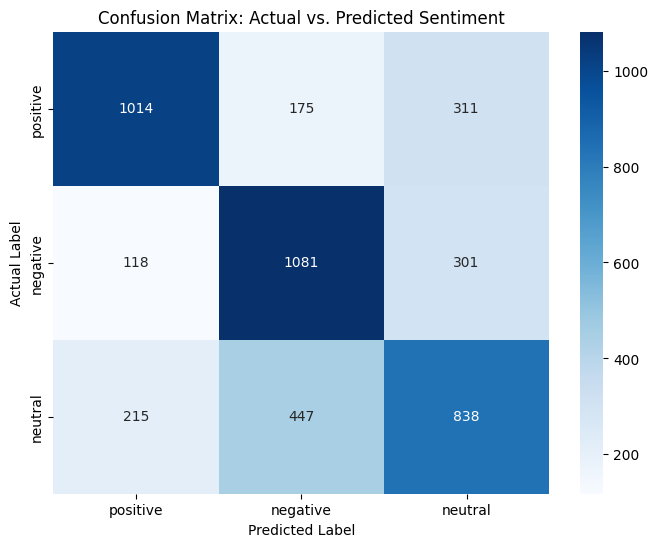

In [16]:
# Create a confusion matrix to visualize the relationship between actual and predicted labels
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_labels, predicted_labels_sentiment, labels=['positive', 'negative', 'neutral'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Actual vs. Predicted Sentiment')
plt.show()

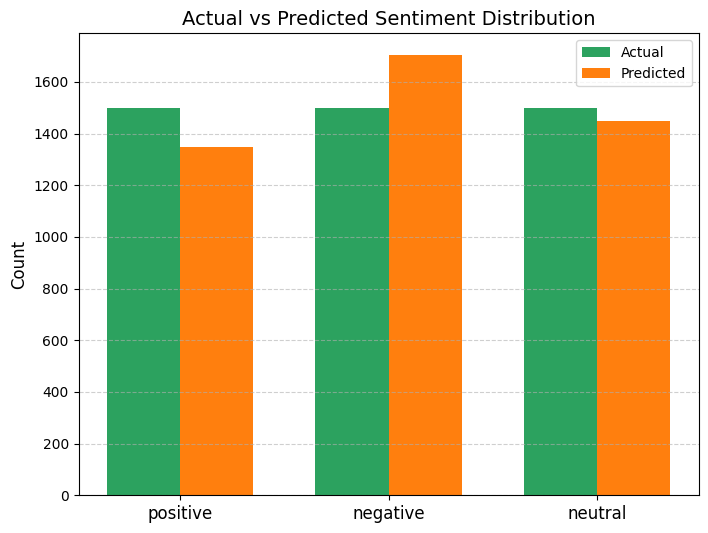

In [23]:
import matplotlib.pyplot as plt

# ---------------------------
# 1) Get counts
# ---------------------------
actual_counts = test_df['label'].value_counts()
pred_counts = test_df['predicted_label'].value_counts()

sentiments = ['positive', 'negative', 'neutral']
actual = [actual_counts.get(s, 0) for s in sentiments]
pred = [pred_counts.get(s, 0) for s in sentiments]

# ---------------------------
# 2) Plot comparison graph
# ---------------------------
x = range(len(sentiments))
bar_width = 0.35

plt.figure(figsize=(8, 6))

# Pleasant colors
plt.bar([i - bar_width/2 for i in x], actual,
        width=bar_width, color='#2ca25f', label='Actual')   # teal
plt.bar([i + bar_width/2 for i in x], pred,
        width=bar_width, color='#ff7f0e', label='Predicted') # orange

# ---------------------------
# 3) Styling with dark font
# ---------------------------
plt.xticks(x, sentiments, fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.title("Actual vs Predicted Sentiment Distribution", fontsize=14, color='black')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
